# 📝 Exploration

This section focuses on initial data loading and preliminary exploration of the dataset to understand its structure and content.

In [47]:
import pandas as pd

In [48]:
# Replace with the raw URL of your dataset from GitHub
data_url = 'https://raw.githubusercontent.com/MuhammadHelmyOmar/Chezlong/refs/heads/main/data/plain/nafsy.csv'

df = pd.read_csv(data_url)
print(f"Successfully loaded data from.")
display(df.head())
print(len(df))

Successfully loaded data from.


,title,content,writer,date
0,نافذة جوهاري في العلاقات مع الآخرين,نافذة جوهاري هي نموذج اتصال ، يمكن استخدامها ل...,أ.سعد فليان المدعث,"الجمعة, مارس 25, 2016 - 23:46"
1,اضطراب قلق الأمراض,قلق الأمراض هو أحد الإضطرابات النفسية الشائعة....,Abdullah Subaie,"السبت, فبراير 6, 2016 - 20:57"
2,اضطراب الأعراض الجسمية,هو أحد الاضطرابات العصابية التي تندرج تحت ما ي...,Abdullah Subaie,"الأربعاء, فبراير 3, 2016 - 20:20"
3,اضطراب ثنائي القطب لدى الأطفال,يمكن أن يحدث الاضطراب الوجداني ثنائي القطب لدى...,Tahani AL-Sharief,"الخميس, يناير 21, 2016 - 13:38"
4,الذين يمشون خلال النوم لايشعرون بألم الحوادث,المشي أثناء النوم اضطراب شائع يصيب حوالي 4% من...,kholoud,"الجمعة, ديسمبر 4, 2015 - 23:14"


664


## 📊 Basic Statistics

This subsection computes and visualizes fundamental statistical properties of the dataset, including article lengths, word lengths, and counts of unique writers. It helps in identifying data characteristics and potential outliers.

In [49]:
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt', quiet=True) # Download tokenizer if not already present
nltk.download('punkt_tab', quiet=True) # Download punkt_tab resource

True

In [50]:
# Writers
display(df['writer'].value_counts())

,count
writer,
الإدارة,609
Admin,11
د.صلاح الدين السرسى,9
أ. عبدالرحيم الريفي,6
kholoud,4
Tahani AL-Sharief,4
أ.سعد فليان المدعث,3
Buthena,3
Abdullah Subaie,3


In [51]:
# Null Values
print(df.isnull().sum())

title      0
content    0
writer     0
date       0
dtype: int64


,title,content,writer,date,article_size
0,نافذة جوهاري في العلاقات مع الآخرين,نافذة جوهاري هي نموذج اتصال ، يمكن استخدامها ل...,أ.سعد فليان المدعث,"الجمعة, مارس 25, 2016 - 23:46",10055
1,اضطراب قلق الأمراض,قلق الأمراض هو أحد الإضطرابات النفسية الشائعة....,Abdullah Subaie,"السبت, فبراير 6, 2016 - 20:57",7920
2,اضطراب الأعراض الجسمية,هو أحد الاضطرابات العصابية التي تندرج تحت ما ي...,Abdullah Subaie,"الأربعاء, فبراير 3, 2016 - 20:20",7705
3,اضطراب ثنائي القطب لدى الأطفال,يمكن أن يحدث الاضطراب الوجداني ثنائي القطب لدى...,Tahani AL-Sharief,"الخميس, يناير 21, 2016 - 13:38",4995
4,الذين يمشون خلال النوم لايشعرون بألم الحوادث,المشي أثناء النوم اضطراب شائع يصيب حوالي 4% من...,kholoud,"الجمعة, ديسمبر 4, 2015 - 23:14",1075
...,...,...,...,...,...
659,اضطرابات الإخراج: التبول اللاإرادي,يبدأ ضبط البول لدى الأطفال في عمر سنتان أو ثلا...,أ. عبدالرحيم الريفي,"الخميس, أبريل 23, 2015 - 23:39",1660
660,Olanzipine,Zyprexa /Olanzapine\n.زيبركسا (أولانزابين)\nال...,Admin,"الاثنين, أبريل 20, 2015 - 22:15",3280
661,الطلاق العاطفي,يخطئ من يتصور أن للطلاق صورة واحدة هي التي تعا...,Admin,"الجمعة, أبريل 17, 2015 - 11:31",4025
662,العناد عند الأطفال,العناد ظاهرة شائعة لدى الأطفال ، وهي تعبير عن ...,Admin,"الجمعة, أبريل 17, 2015 - 11:18",6028


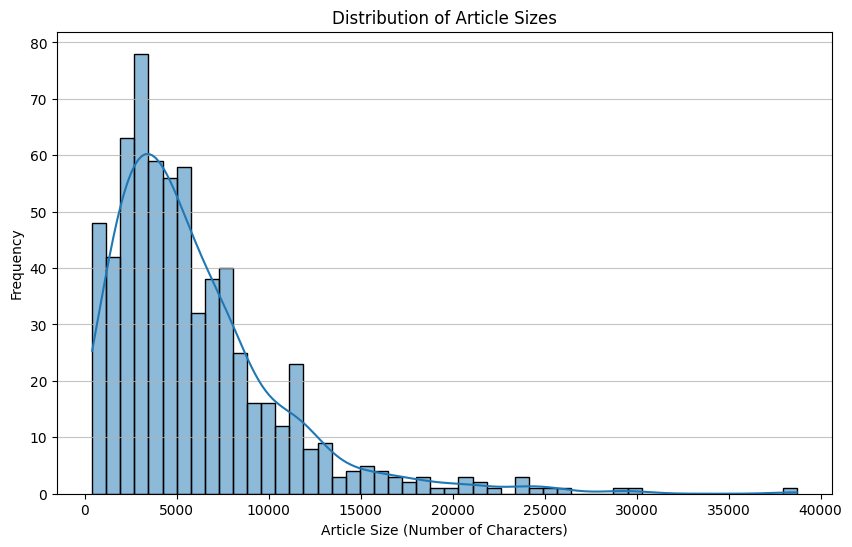

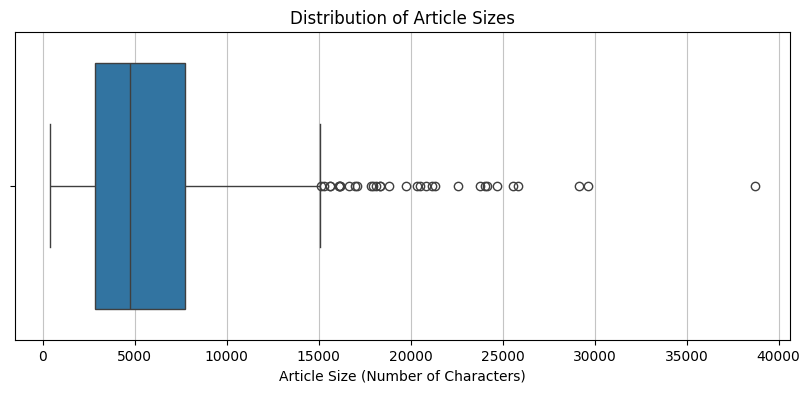

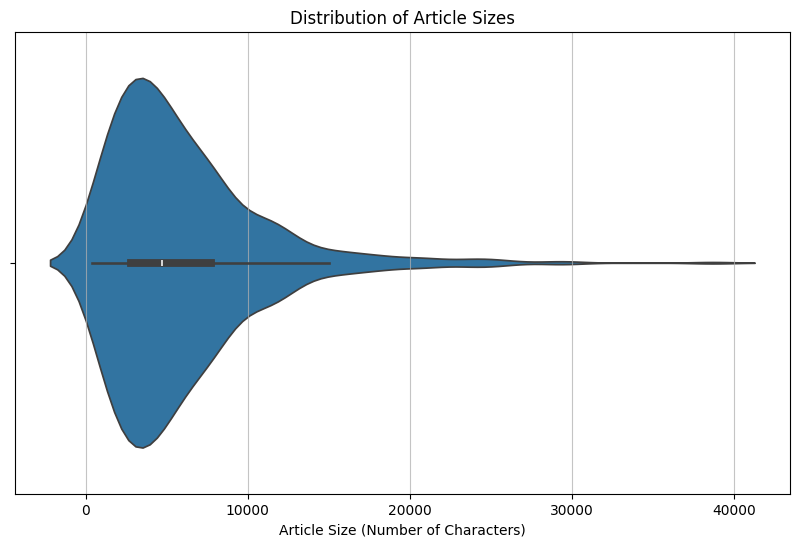

In [52]:
# Articles Lengths
df['article_size'] = df['content'].apply(lambda article: len(article))
display(df)

# Plot Article Sizes Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['article_size'], bins=50, kde=True)
plt.title('Distribution of Article Sizes')
plt.xlabel('Article Size (Number of Characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot Article Sizes Distribution (Box Plot)
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['article_size'])
plt.title('Distribution of Article Sizes')
plt.xlabel('Article Size (Number of Characters)')
plt.grid(axis='x', alpha=0.75)
plt.show()

# Plot Article Sizes Distribution (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['article_size'])
plt.title('Distribution of Article Sizes')
plt.xlabel('Article Size (Number of Characters)')
plt.grid(axis='x', alpha=0.75)
plt.show()

**Insights**:
  - No articles with an 'article_size' less than or equal to the calculated lower whisker bound.
  - However, there are articles with 'article_size' values significantly larger than the maximum whisker (upper quartile + 1.5 * IQR).
    - We might need to split those articles into smaller chunks.

In [53]:
# Calculate the lower quartile (25th percentile) of 'article_size'
lower_quartile = df['article_size'].quantile(0.25)
print(f"Lower quartile (25th percentile) of article_size: {lower_quartile}")

# Calculate the upper quartile (Q3) of 'article_size'
upper_quartile = df['article_size'].quantile(0.75)
print(f"Upper quartile (75th percentile) of article_size: {upper_quartile}")

# Calculate the Interquartile Range (IQR)
iqr = upper_quartile - lower_quartile
print(f"Interquartile Range (IQR): {iqr}")

# Calculate the upper whisker bound
whisker_max = upper_quartile + 1.5 * iqr
print(f"Upper whisker of article_size: {whisker_max}")

print(f"Number of articles with article_size larger than the upper quartile: {len(df[df['article_size'] >= upper_quartile])}")

print(f"Number of articles with article_size larger than the upper whisker: {len( df[df['article_size'] >= whisker_max])}")

Lower quartile (25th percentile) of article_size: 2819.0
Upper quartile (75th percentile) of article_size: 7719.25
Interquartile Range (IQR): 4900.25
Upper whisker of article_size: 15069.625
Number of articles with article_size larger than the upper quartile: 166
Number of articles with article_size larger than the upper whisker: 33


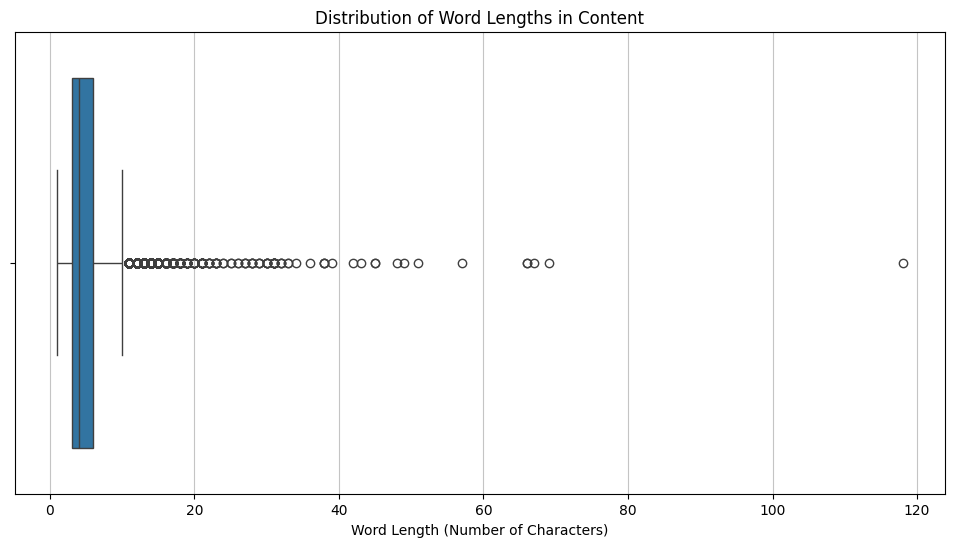

,count
content,
5,117507
4,112234
2,103350
3,103288
6,98035
7,75864
1,73446
8,35821
9,13173



Examples of words longer than 16 characters (outliers):

  - Article ID: 3, Word: '//www.mayoclinic.org' (20 characters)
  - Article ID: 3, Word: '//www.rcpsych.ac.uk/healthadvice' (32 characters)
  - Article ID: 3, Word: '//www.hindawi.com/journals/psychiatry/2014' (42 characters)
  - Article ID: 3, Word: '//www.nimh.nih.gov/health' (25 characters)
  - Article ID: 3, Word: '//www.al-health.net' (19 characters)
  - Article ID: 16, Word: '//www.psychologytoday.com/blog/think-act-be/201508/the-most-import' (66 characters)
  - Article ID: 17, Word: '//scattergoodfoundation.org/activity/general/methods-reduce-stigma' (66 characters)
  - Article ID: 17, Word: '//www.healthyplace.com/blogs/survivingmentalhealthstigma/2012/05/fear-false-beliefs-and-blame-in-mental-health-stigma/' (118 characters)
  - Article ID: 18, Word: '//www.webmd.com/mental-health/mental-health-pica' (48 characters)
  - Article ID: 20, Word: 'الدم_البلغم_الصفراء_السوداء' (27 characters)


In [54]:
# Function to calculate word lengths for a given text
def get_word_lengths(text):
    if pd.isna(text):
        return []
    words = word_tokenize(str(text))
    return [len(word) for word in words]

# Apply the function and flatten the list of lists into a single list of all word lengths
all_word_lengths = df['content'].apply(get_word_lengths).explode()

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=all_word_lengths)
plt.title('Distribution of Word Lengths in Content')
plt.xlabel('Word Length (Number of Characters)')
plt.grid(axis='x', alpha=0.75)
plt.show()

# Check the occurences of each length
display(all_word_lengths.value_counts())

"------------------------------------------------------------------------------"

# Print some of the long words (outliers)

# Define a threshold for what constitutes a 'long word'
long_word_threshold = 16 # أَفإِستسقيناكموهما

print(f"\nExamples of words longer than {long_word_threshold} characters (outliers):\n")

# Keep track of printed examples to limit output
printed_examples_count = 0
max_examples_to_print = 10

# Iterate through each article content
for index, content in df['content'].items():
    if printed_examples_count >= max_examples_to_print:
        break

    # Tokenize the content into words
    words = word_tokenize(str(content))

    # Check each word's length
    for word in words:
        if len(word) > long_word_threshold:
            print(f"  - Article ID: {index}, Word: '{word}' ({len(word)} characters)")
            printed_examples_count += 1
            if printed_examples_count >= max_examples_to_print:
                break

**Insights**:
  - It seems that the too long words are actually URLs or words connected with '_'.

## 🔍 Detect Unusual Text

This part aims to identify and analyze specific patterns of 'unusual' text within the article content, such as Latin alphabets, HTML tags, emojis, and URLs. This is crucial for understanding the data's composition and preparing for cleaning.

In [55]:
import re

In [56]:
# Identifying text containing latin Alphabet
  # Arabic Unicode range: U+0600–U+06FF
  # Basic Latin alphabetic range: a-zA-Z

english_latin_regex = re.compile(r'[a-zA-Z]')

# Function to check for English/Latin characters in a string
def contains_english_latin(text):
    return bool(english_latin_regex.search(text))

# Apply the function to the 'content' column
df['contains_english_latin'] = df['content'].apply(contains_english_latin)

# Display the count of articles that contain English/Latin characters
print('Number of articles containing English/Latin alphabetic characters:')
display(df['contains_english_latin'].value_counts())

# Display a few examples of articles that contain English/Latin characters
print('\nExamples of articles containing English/Latin alphabetic characters:')
display(df[df['contains_english_latin']].head())
display(df[df['contains_english_latin']]['content'][0])

Number of articles containing English/Latin alphabetic characters:


,count
contains_english_latin,
False,394
True,270



Examples of articles containing English/Latin alphabetic characters:


,title,content,writer,date,article_size,contains_english_latin
0,نافذة جوهاري في العلاقات مع الآخرين,نافذة جوهاري هي نموذج اتصال ، يمكن استخدامها ل...,أ.سعد فليان المدعث,"الجمعة, مارس 25, 2016 - 23:46",10055,True
1,اضطراب قلق الأمراض,قلق الأمراض هو أحد الإضطرابات النفسية الشائعة....,Abdullah Subaie,"السبت, فبراير 6, 2016 - 20:57",7920,True
2,اضطراب الأعراض الجسمية,هو أحد الاضطرابات العصابية التي تندرج تحت ما ي...,Abdullah Subaie,"الأربعاء, فبراير 3, 2016 - 20:20",7705,True
3,اضطراب ثنائي القطب لدى الأطفال,يمكن أن يحدث الاضطراب الوجداني ثنائي القطب لدى...,Tahani AL-Sharief,"الخميس, يناير 21, 2016 - 13:38",4995,True
4,الذين يمشون خلال النوم لايشعرون بألم الحوادث,المشي أثناء النوم اضطراب شائع يصيب حوالي 4% من...,kholoud,"الجمعة, ديسمبر 4, 2015 - 23:14",1075,True


'نافذة جوهاري هي نموذج اتصال ، يمكن استخدامها لتحسين التفاهم بين الأفراد داخل فريق أو مجموعة. و وضع هذا النظام (جوزيف لوفت) و(هاري) ، فكلمة "جوهاري" من (جوزيف لوفت) و(هاري) ، واليك شرح هذه النافذة:\n\n1.المنطقة العمياء أوالذات العمياء:\nنحن قد نتحدث بطريقة معينة , أو بلهجة معينة , وعلي وجوهنا تعبير ما , نحن لا نري ذلك التعبير ، ولكن الناس يرونه ويدركونه ، وفي واقع الأمر أن سلوكنا يؤثر في كيف يرانا الناس ، وبالتالي يؤثر في كيفية تعاملهم معنا .\nيعني ذلك أني أثناء حديثي مع الناس قد أرسل لهم رسائل غير لفظية , مثل حركات اليد والجلسة وتعابير الوجه ، وهذه الرسائل ستجعلهم يرونني بمنظار ما ، ويقدرون أمراً ما بخصوصي . وقد يخفى الأمر علي (لأنني لا أري ما أفعل).\nباختصار هذه المنطقة العمياء , لا يمكن تجاهلها أو التقليل من أثرها عند تعاملنا مع الناس في الحياة وفي المنزل وبين الأصدقاء وعند التفاوض مع الآخرين للوصول إلي ما نريد.\nهذه السلوكيات العمياء – أي غير المعروفة لنا في الوعي – هي سلوكيات منقولة ومنسوخة من أناس ما في حياتك الماضية لما كنت صغيراً .\n( لقد نسختها بدون وعي لذلك قد لا تدركها عندما

**Insight**:
  - The latin words here are important because they are medical terms.

In [57]:
# Detect common HTML tags
html_tag_regex = re.compile(r'<[a-zA-Z][^>]*>.*?</[a-zA-Z][^>]*>|<[a-zA-Z][^>]*/>')

# Function to check for HTML tags in a string
def contains_html_tags(text):
    return bool(html_tag_regex.search(str(text)))

# Apply the function to the 'content' column
df['contains_html_tags'] = df['content'].apply(contains_html_tags)

# Display the count of articles that contain HTML tags
print('Number of articles containing HTML tags:')
display(df['contains_html_tags'].value_counts())

Number of articles containing HTML tags:


,count
contains_html_tags,
False,664


In [58]:
# Detect a comprehensive wide range of Unicode emojis
emoji_regex = re.compile(
    "[" \
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U00002702-\U000027B0"
    "\U000024C2-\U0001F251"
    "]+"
    , flags=re.UNICODE)

# Function to check for emojis in a string
def contains_emoji(text):
    return bool(emoji_regex.search(str(text)))

# Apply the function to the 'content' column
df['contains_emoji'] = df['content'].apply(contains_emoji)

# Display the count of articles that contain emojis
print('Number of articles containing emojis:')
display(df['contains_emoji'].value_counts())

# Display a few examples of articles that contain emojis
print('\nExamples of articles containing emojis:')
display(df[df['contains_emoji']].head())
print(df[df['contains_emoji']]['content'].iloc[0])

Number of articles containing emojis:


,count
contains_emoji,
False,643
True,21



Examples of articles containing emojis:


,title,content,writer,date,article_size,contains_english_latin,contains_html_tags,contains_emoji
23,برامج صحية تقلل من فرص ارتكاب الجرائم ضد الآخر...,رغم أن العواطف البشرية مشاعر طبيعية وغريزية يش...,MahaAljuryyed,"الاثنين, أغسطس 31, 2015 - 19:58",1941,False,False,True
100,التفكير الإبداعي ... الغرس والحصاد,نسمع دوما عن مفهوم إبداع، ومبدع؟ وعمل إبداعي، ...,الإدارة,"الاثنين, يونيو 22, 2015 - 15:05",6638,True,False,True
172,الانفعال,من منا لم يمر بموقف انفعال؟! الكثير من المواق...,الإدارة,"الثلاثاء, يونيو 16, 2015 - 17:19",3650,True,False,True
224,دافعية النوم ودافعية اليقظة (1),تمثل عمليتي النوم واليقظة أمرا ضروريا لبقاء ال...,الإدارة,"الاثنين, يونيو 15, 2015 - 11:01",6907,True,False,True
283,حياءٌ أم خجل!؟,طلبت منها المعلمة طرح موضوعها على مسامع زميلات...,الإدارة,"الجمعة, يونيو 12, 2015 - 13:58",8023,False,False,True


رغم أن العواطف البشرية مشاعر طبيعية وغريزية يشترك فيها جميع الناس فإن إدراكها والتأثر بها يختلف اختلافاً كبيراً من شخص لأخر. والبديهي أن أصحاب المشاعر الرقيقة في الأغلب لا يمكنهم ارتكاب الأعمال العنيفة والجرائم وذلك لأن لديهم إحساساً مفرطاً بمشاعر الآخرين وتعبيرات الألم على الوجوه, وهو الأمر الذي يجعل من إيذاء الآخرين أمراَ شديد الصعوبة وحتى في حالة ممارستهم العنف فإنه يكون أقل حدة, وأنه كلما ارتفع الوعي بمشاعر الآخرين من خلال إدراك تعبيرات الوجه كلما قلت فرصة ارتكاب الجرائم .
ومن هذه البرامج :
♦ تغيير المشاعر السلبية : لاحظت الدراسات السابقة أن أولئك الذين يمارسون العنف لديهم مشاكل أو صعوبات في التعرف على تعبيرات الوجه وبشكل خاص مشاعر الخوف والحزن والألم .
وقد نجحت دراسة في تقليل مقدار العدوانية لدى المراهقين الذين يمارسون العنف سواء ضد الأقران أو الإخوة الأصغر عمراً من خلال برنامج يؤهل للتحكم في ردود الفعل الغاضبة وهو الأمر الذي يشير إلى إمكانية تغيير المشاعر السلبية إلى مشاعر إيجابية من خلال برنامج نفسي وعاطفي معد مسبقاً .
♦ تعبيرات الوجوه : لاحظ الباحثون من خلال التجارب انخفاض معدل

In [59]:
# Detect common URL patterns
url_regex = re.compile(r'https?://(?:www\.)?\S+|www\.\S+|\S+\.(?:com|org|net|gov|edu|io|co|me|ai|ly|blog|info|biz|dev)[/\w\.-]*', re.IGNORECASE)

# Function to check for URLs in a string
def contains_url(text):
    return bool(url_regex.search(str(text)))

# Apply the function to the 'content' column
df['contains_url'] = df['content'].apply(contains_url)

# Display the count of articles that contain URLs
print('Number of articles containing URLs:')
display(df['contains_url'].value_counts())

# Display a few examples of articles that contain URLs
print('\nExamples of articles containing URLs:')
url_articles = df[df['contains_url']]

if not url_articles.empty:
    display(url_articles.head())
    print(url_articles['content'].iloc[3])
else:
    print("No articles found containing URLs.")

Number of articles containing URLs:


,count
contains_url,
False,648
True,16



Examples of articles containing URLs:


,title,content,writer,date,article_size,contains_english_latin,contains_html_tags,contains_emoji,contains_url
1,اضطراب قلق الأمراض,قلق الأمراض هو أحد الإضطرابات النفسية الشائعة....,Abdullah Subaie,"السبت, فبراير 6, 2016 - 20:57",7920,True,False,False,True
2,اضطراب الأعراض الجسمية,هو أحد الاضطرابات العصابية التي تندرج تحت ما ي...,Abdullah Subaie,"الأربعاء, فبراير 3, 2016 - 20:20",7705,True,False,False,True
3,اضطراب ثنائي القطب لدى الأطفال,يمكن أن يحدث الاضطراب الوجداني ثنائي القطب لدى...,Tahani AL-Sharief,"الخميس, يناير 21, 2016 - 13:38",4995,True,False,False,True
16,الأرق المزمن: كيف تتخلص منه بدون أدوية؟,يعاني الكثير من الناس من الأرق الذي يخشون أن ي...,Abdullah Subaie,"السبت, سبتمبر 26, 2015 - 12:06",4729,True,False,False,True
17,مكافحة وصمة المرض العقلي,اطلقت الجمعية العالمية للطب النفسي عام 1996 بر...,kholoud,"السبت, سبتمبر 26, 2015 - 11:49",5011,True,False,False,True


يعاني الكثير من الناس من الأرق الذي يخشون أن يقودهم إلى الجنون يوماً ما. وتمتد هذه الحال بهم لعدة سنوات يلجأون فيها لكل أسلوب ودواء ممكن للحصول على ساعة من النوم.
وقد ظهر بفضل الله ما يسمى بالعلاج المعرفي السلوكي للأرق (CBT-I)، وهو مخصص بالضبط لهذه الفئة التي تعاني سنين طويلة من مشكلة الأرق المزمن.
ويرتكز هذا النوع من العلاج على التخلي عن فكرة "كيف سأنام الليلة؟" إلى إصلاح أسلوب التعامل مع النوم بشكل عام.  فيما يلي نشرح كيف سارت الأمور أصلاً في اتجاه الأرق المزمن:
1. يحصل شيء ما يمنعك من النوم: الباب الذي يغلق بقوة، ازعاج الأطفال، رنين الهاتف، التفكير في العمل...الخ.
2. تفعل في اليوم التالي ما هو متوقع أن تفعله: وهو التأخر في الإستيقاظ ساعة أو ساعتين، أو الإستغراق في قيلولة بعد الظهر.  مهما يكن من أمر فإن ما قمت به هو محاولة لتعويض ما فقدته من ساعات نومك البارحة، وهذا أمر جيد إن نجح. ولكن ما ذا لو لم تستطع النوم في النهار؟
3. ماذا لو لم تستطع النوم بشكل جيد الليلة التالية؟ هنا تدخل في القلق من عدم النوم "كيف سأنام الليلة؟"، مع أن أصل المشكلة لا وجود له الآن وهو رنين الهاتف أو ازعاج الأ

## ☁️ Word Clouds

This section generates word clouds for both article titles and content to visually represent the most frequent words. This provides a quick overview of the prominent themes and topics in the dataset, after removing common Arabic stopwords.

In [60]:
!pip install -qU arabic-reshaper python-bidi ar_wordcloud

In [61]:
from ar_wordcloud import ArabicWordCloud
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper
import nltk
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# Function to preprocess Arabic text for word cloud, including stopword removal
def preprocess_arabic_text(text):
    # Remove Arabic stopwords
    filtered_words = [word for word in text.split() if word not in arabic_stopwords]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    # Reshape Arabic text and handle bidirectional display
    reshaped_text = arabic_reshaper.reshape(cleaned_text)
    bidi_text = get_display(reshaped_text)

    return bidi_text

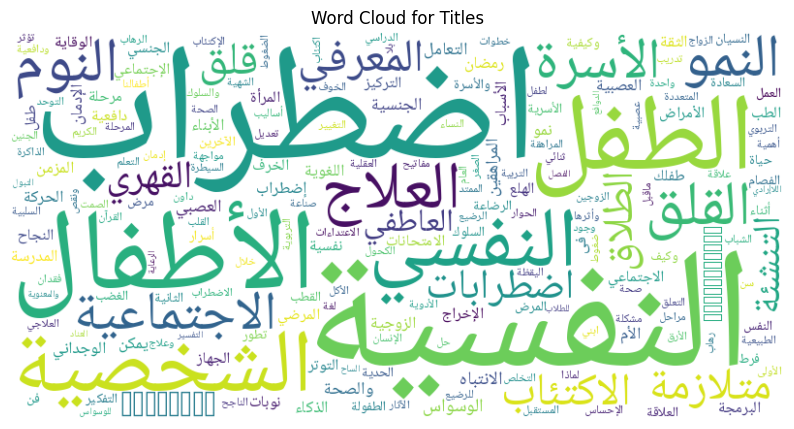

In [63]:
# Combine all titles into a single string
all_titles = ' '.join(df['title'].dropna().apply(preprocess_arabic_text))

# Generate Word Cloud for titles
title_wordcloud = ArabicWordCloud(background_color="white", width=800, height=400, stopwords=list(arabic_stopwords), collocations=False)
title_wordcloud.from_text(all_titles)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles')
plt.show()

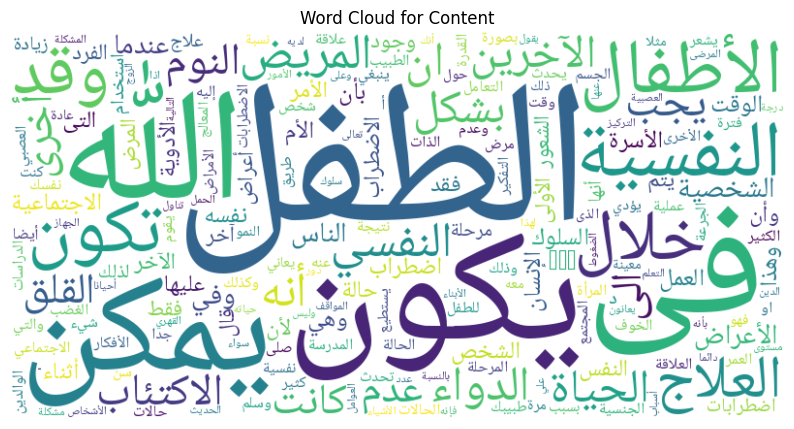

In [64]:
# Combine all contents into a single string
all_content = ' '.join(df['content'].dropna().apply(preprocess_arabic_text))

# Generate Word Cloud for content
content_wc = ArabicWordCloud(background_color="white", width=800, height=400, stopwords=list(arabic_stopwords), collocations=False)
content_wc.from_text(all_content)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(content_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Content')
plt.show()

## 🔎 Detecting Discrepancies

This section specifically checks for identical duplicate rows within the dataset. Identifying duplicates is an important step in data cleaning to ensure data integrity and avoid biased analysis.

In [65]:
# Check for identical duplicates across all columns
duplicates = df[df.duplicated(keep=False)]

print(f"Number of identical duplicate rows: {len(duplicates)}")

if not duplicates.empty:
    print("\nExamples of identical duplicate rows (showing all duplicates for clarity):")
    display(duplicates.sort_values(by=list(df.columns)).head(6))
else:
    print("No identical duplicate rows found.")

Number of identical duplicate rows: 6

Examples of identical duplicate rows (showing all duplicates for clarity):


,title,content,writer,date,article_size,contains_english_latin,contains_html_tags,contains_emoji,contains_url
111,أساس السعادة الأسرية,السعادة الأسرية مفهوم يجب أولا أن نتفق عليه قب...,الإدارة,"الأربعاء, يونيو 17, 2015 - 11:07",11846,False,False,False,False
112,أساس السعادة الأسرية,السعادة الأسرية مفهوم يجب أولا أن نتفق عليه قب...,الإدارة,"الأربعاء, يونيو 17, 2015 - 11:07",11846,False,False,False,False
161,الاعتداءات الجنسية في الصغر وأثرها الممتد,أشارت دراسات بريطانية أنه بين كل أربعة أطفال، ...,الإدارة,"الثلاثاء, يونيو 16, 2015 - 19:40",535,False,False,False,False
162,الاعتداءات الجنسية في الصغر وأثرها الممتد,أشارت دراسات بريطانية أنه بين كل أربعة أطفال، ...,الإدارة,"الثلاثاء, يونيو 16, 2015 - 19:40",535,False,False,False,False
175,قلق الطفولة وفقدان الشهية في المستقبل,أشارت دراسة حديثة نشرت في الدورية الدولية لاضط...,الإدارة,"الثلاثاء, يونيو 16, 2015 - 17:13",1038,False,False,False,False
176,قلق الطفولة وفقدان الشهية في المستقبل,أشارت دراسة حديثة نشرت في الدورية الدولية لاضط...,الإدارة,"الثلاثاء, يونيو 16, 2015 - 17:13",1038,False,False,False,False


# 🧹 Cleaning

This major section is dedicated to cleaning the dataset. It involves several preprocessing steps to normalize text, remove redundancies, and eliminate unwanted characters or patterns.

### 🗑️ Remove Identical Duplicates

This step removes rows that are completely identical across all columns to ensure each record is unique.

In [66]:
print(f"DataFrame shape before removing duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after removing duplicates: {df.shape}")

DataFrame shape before removing duplicates: (664, 9)
DataFrame shape after removing duplicates: (661, 9)


### ✍️ Normalization (Unicode Fixation + Dediacritization)

This section focuses on standardizing Arabic text. It includes converting Latin digits to Arabic digits, replacing English question marks with Arabic ones, applying Unicode normalization for consistency, and removing diacritics (vowel marks) from the text.

In [67]:
!pip install -qU camel-tools

In [68]:
from camel_tools.utils.dediac import dediac_ar

In [69]:
# Mapping for English digits to Arabic digits
arabic_digits_map = str.maketrans('0123456789', '٠١٢٣٤٥٦٧٨٩')

def normalize_arabic_text(text):
    text = str(text)
    # Normalize digits from English to Arabic
    text = text.translate(arabic_digits_map)
    # Replace English question mark with Arabic question mark
    text = text.replace('?', '؟')
    # Apply Unicode normalization (NFC is a common form for Arabic)
    normalized_text = text.encode('utf-8').decode('utf-8')
    # Remove diacritics
    dediac_text = dediac_ar(normalized_text)
    return dediac_text

# Apply the normalization and diacritic removal to 'content' and 'title' columns
df['content_normalized'] = df['content'].apply(normalize_arabic_text)
df['title_normalized'] = df['title'].apply(normalize_arabic_text)

### 🧹 Remove Redundancy

This step cleans the text by removing excessive whitespace (multiple newlines or spaces), trimming leading/trailing whitespace, and reducing character repetitions (e.g., 'aaa' to 'aa').

In [70]:
import re

In [71]:
def remove_redundant(text):
    text = str(text)
    # Replace multiple newlines with a single newline
    text = re.sub(r'\n{2,}', '\n', text)
    # Replace multiple other whitespace characters (spaces, tabs) with a single space
    text = re.sub(r'[ \t]+', ' ', text)
    # Remove leading/trailing whitespace, including any newlines at the start or end.
    text = text.strip()
    # Regex to find any character (including Arabic) repeated more than 2 times and replace it with 2 repetitions.
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

# Apply the function to normalized 'content' and 'title' columns
df['content_normalized_no_redundancy'] = df['content_normalized'].apply(remove_redundant)
df['title_normalized_no_redundancy'] = df['title_normalized'].apply(remove_redundant)

### 🚫 Remove Unusual Text (URLs and Emojis)

This final cleaning step removes URLs and emojis from the text content. These elements are often irrelevant for text analysis tasks and can interfere with linguistic processing.

In [73]:
# Function to remove emojis from a string
def remove_emojis(text):
    return emoji_regex.sub('', str(text))

# Apply the function to the existing 'content_cleaned' column
df['content_cleaned'] = df['content_normalized_no_redundancy'].apply(remove_emojis)

# Display the count of articles that contain emojis
print('Number of articles containing emojis:')
display((df['content_cleaned'].apply(contains_emoji)).value_counts())

Number of articles containing emojis:


,count
content_cleaned,
False,661


In [74]:
# Function to remove URLs from a string
def remove_urls(text):
    return url_regex.sub('', str(text))

# Apply the function to the normalized and redundancy-free content and title columns
df['content_cleaned'] = df['content_cleaned'].apply(remove_urls)

# Display the count of articles that contain URLs
print('Number of articles containing URLs:')
display((df['content_cleaned'].apply(contains_url)).value_counts())

Number of articles containing URLs:


,count
content_cleaned,
False,661


In [77]:
df.columns

Index(['title', 'content', 'writer', 'date', 'article_size',
       'contains_english_latin', 'contains_html_tags', 'contains_emoji',
       'contains_url', 'content_normalized', 'title_normalized',
       'content_normalized_no_redundancy', 'title_normalized_no_redundancy',
       'content_cleaned'],
      dtype='object')

In [78]:
# Select and rename columns as specified
cleaned_df = df[['title_normalized_no_redundancy', 'content_cleaned', 'writer', 'date']].copy()
cleaned_df.rename(columns={'title_normalized_no_redundancy': 'title_cleaned'}, inplace=True)

# Save the DataFrame to a CSV file
output_filename = 'nafsy_cleaned.csv'
cleaned_df.to_csv(output_filename, index=False)

print(f"Cleaned data saved to '{output_filename}' with specified columns.")
display(cleaned_df.head())

Cleaned data saved to 'nafsy_cleaned.csv' with specified columns.


,title_cleaned,content_cleaned,writer,date
0,نافذة جوهاري في العلاقات مع الآخرين,نافذة جوهاري هي نموذج اتصال ، يمكن استخدامها ل...,أ.سعد فليان المدعث,"الجمعة, مارس 25, 2016 - 23:46"
1,اضطراب قلق الأمراض,قلق الأمراض هو أحد الإضطرابات النفسية الشائعة....,Abdullah Subaie,"السبت, فبراير 6, 2016 - 20:57"
2,اضطراب الأعراض الجسمية,هو أحد الاضطرابات العصابية التي تندرج تحت ما ي...,Abdullah Subaie,"الأربعاء, فبراير 3, 2016 - 20:20"
3,اضطراب ثنائي القطب لدى الأطفال,يمكن أن يحدث الاضطراب الوجداني ثنائي القطب لدى...,Tahani AL-Sharief,"الخميس, يناير 21, 2016 - 13:38"
4,الذين يمشون خلال النوم لايشعرون بألم الحوادث,المشي أثناء النوم اضطراب شائع يصيب حوالي ٤% من...,kholoud,"الجمعة, ديسمبر 4, 2015 - 23:14"


# To-do